In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_excel("/media/rohith/15905E2C2B6C1D69/vscode/Rotten_Tomatoes_Movies3/Rotten_Tomatoes_Movies3.xls")
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


In [3]:
df.columns

Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date',
       'runtime_in_minutes', 'studio_name', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_rating'],
      dtype='object')

In [4]:
# Check for missing values
print(df.isnull().sum())


movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
dtype: int64


In [5]:

# Fill or drop missing values as appropriate
df['audience_rating'].fillna(df['audience_rating'].mean(), inplace=True)

# Select features and target variable
X = df.drop(columns=['audience_rating'])
y = df['audience_rating']

# Identify categorical and numerical columns
categorical_cols = ['rating', 'genre', 'directors', 'writers', 'cast', 'studio_name', 'tomatometer_status']
numerical_cols = ['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count']

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

/tmp/ipykernel_27734/3999589493.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['audience_rating'].fillna(df['audience_rating'].mean(), inplace=True)


In [6]:
# Check for missing values in the feature set
print(X.isnull().sum())

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
dtype: int64


In [7]:
from sklearn.impute import SimpleImputer

# Create an imputer for numerical columns
num_imputer = SimpleImputer(strategy='mean')

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', num_imputer), ('scaler', StandardScaler())]), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [8]:
# Split the data into training and testing sets again if needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with the updated preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['runtime_in_minutes',
                                                   'tomatometer_rating',
                                                   'tomatometer_count']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['rating', 'genre',
                                                   'directors', 'writers',
                                                   'cast', 'studio_name',
                                                   'tomatometer_status'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [9]:
# Make predictions
y_pred = pipeline.predict(X_test)


In [10]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 212.00541667631464
R-squared: 0.4802872372269893


In [11]:
# Step 11: Prediction Accuracy
prediction_accuracy = 100 - np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Prediction Accuracy: {prediction_accuracy:.2f}%")

Prediction Accuracy: 75.58%


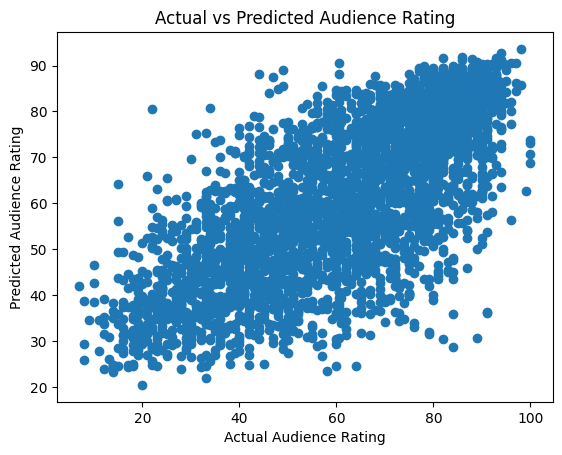

In [12]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Audience Rating')
plt.ylabel('Predicted Audience Rating')
plt.title('Actual vs Predicted Audience Rating')
plt.show()

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
dtype: int64
movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
dtype: int64


/tmp/ipykernel_27734/1197192215.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['audience_rating'].fillna(df['audience_rating'].mean(), inplace=True)


Mean Squared Error: 212.00541667631464
R-squared: 0.4802872372269893
Prediction Accuracy: 75.58%


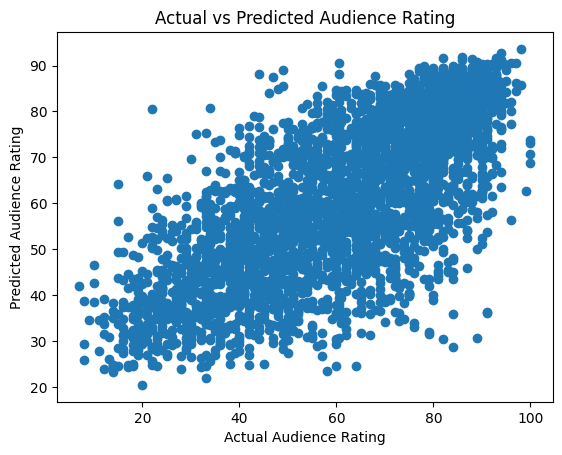

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df=pd.read_excel("/media/rohith/15905E2C2B6C1D69/vscode/Rotten_Tomatoes_Movies3/Rotten_Tomatoes_Movies3.xls")
df.head()

# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values as appropriate
df['audience_rating'].fillna(df['audience_rating'].mean(), inplace=True)

# Select features and target variable
X = df.drop(columns=['audience_rating'])
y = df['audience_rating']

# Identify categorical and numerical columns
categorical_cols = ['rating', 'genre', 'directors', 'writers', 'cast', 'studio_name', 'tomatometer_status']
numerical_cols = ['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count']

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Check for missing values in the feature set
print(X.isnull().sum())


from sklearn.impute import SimpleImputer

# Create an imputer for numerical columns
num_imputer = SimpleImputer(strategy='mean')

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', num_imputer), ('scaler', StandardScaler())]), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])


# Split the data into training and testing sets again if needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with the updated preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)


# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Step 11: Prediction Accuracy
prediction_accuracy = 100 - np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Prediction Accuracy: {prediction_accuracy:.2f}%")

import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Audience Rating')
plt.ylabel('Predicted Audience Rating')
plt.title('Actual vs Predicted Audience Rating')
plt.show()

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_excel("/media/rohith/15905E2C2B6C1D69/vscode/Rotten_Tomatoes_Movies3/Rotten_Tomatoes_Movies3.xls")

# Drop columns with high missing values (threshold: 40%)
missing_threshold = 0.4
df = df[df.columns[df.isnull().mean() < missing_threshold]]

# Fill missing values for the target
df['audience_rating'].fillna(df['audience_rating'].mean(), inplace=True)

# Drop columns unlikely to improve model performance
df = df.drop(columns=['movie_title', 'movie_info', 'in_theaters_date', 'on_streaming_date'])

# Split features and target
X = df.drop(columns=['audience_rating'])
y = df['audience_rating']

# Identify categorical and numerical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing
num_imputer = SimpleImputer(strategy='mean')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', num_imputer), ('scaler', StandardScaler())]), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model and Pipeline
rf_model = RandomForestRegressor(random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', rf_model)])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate the best model
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Prediction Accuracy
prediction_accuracy = 100 - np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Prediction Accuracy: {prediction_accuracy:.2f}%")

# Plotting actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Audience Rating')
plt.ylabel('Predicted Audience Rating')
plt.title('Actual vs Predicted Audience Rating')
plt.show()

# Best Parameters
print(f'Best Parameters: {grid_search.best_params_}')


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100; total time=  28.4s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100; total time=  28.9s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100; total time=  29.5s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=  30.8s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=  32.0s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=  32.6s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200; total time= 1.0min
[CV] END model__max_depth=10, model

KeyboardInterrupt: 

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
import tensorflow as tf

# Ensure TensorFlow uses GPU if available
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("GPU not available, using CPU")

# Load the dataset (replace 'dataset.csv' with your dataset file)
data=pd.read_excel("/media/rohith/15905E2C2B6C1D69/vscode/Rotten_Tomatoes_Movies3/Rotten_Tomatoes_Movies3.xls")
data.head()

# Drop irrelevant columns and handle missing values
columns_to_drop = ['movie_title', 'in_theaters_date', 'on_streaming_date', 'studio_name']
data.drop(columns=columns_to_drop, inplace=True)
data.dropna(inplace=True)

# Encode categorical columns
categorical_columns = ['rating', 'genre', 'directors', 'writers', 'cast', 'tomatometer_status']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Preprocess text columns (if needed, e.g., `movie_info`, `critics_consensus`)
def preprocess_text(column):
    return column.str.lower().str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)

data['movie_info'] = preprocess_text(data['movie_info'])
data['critics_consensus'] = preprocess_text(data['critics_consensus'])

# Convert text columns to numerical using length as a simple feature (can replace with NLP embedding)
data['movie_info_length'] = data['movie_info'].apply(len)
data['critics_consensus_length'] = data['critics_consensus'].apply(len)
data.drop(columns=['movie_info', 'critics_consensus'], inplace=True)

# Separate features and target
target = 'audience_rating'
X = data.drop(columns=[target])
y = data[target]

# Normalize numerical columns
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)  # Regression output
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")

# Predict and validate
predictions = model.predict(X_test).flatten()
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Save the model
#model.save('audience_rating_model.h5')

prediction_accuracy = 100 - np.mean(np.abs((y_test - predictions) / y_test)) * 100
print(f"Prediction Accuracy: {prediction_accuracy:.2f}%")


2024-12-20 18:47:04.297935: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-20 18:47:04.545995: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734700624.632697   27734 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734700624.658078   27734 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-20 18:47:04.859811: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

GPU not available, using CPU


W0000 00:00:1734700627.966493   27734 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2842.0815 - mae: 46.8664 - val_loss: 255.6142 - val_mae: 12.7887
Epoch 2/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 317.9290 - mae: 14.2100 - val_loss: 228.2204 - val_mae: 11.9372
Epoch 3/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 299.0562 - mae: 13.8570 - val_loss: 218.4348 - val_mae: 11.7733
Epoch 4/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 278.7639 - mae: 13.2482 - val_loss: 204.5457 - val_mae: 11.3710
Epoch 5/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 262.2768 - mae: 12.9459 - val_loss: 198.7083 - val_mae: 11.2375
Epoch 6/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 258.2751 - mae: 12.9304 - val_loss: 195.0789 - val_mae: 11.0696
Epoch 7/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 246.2972 - mae: 12.4910 - val_loss: 193.4721 - val_mae: 11.1595
Epoch 8/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 245.9449 - mae: 12.5393 - val_loss: 191.8725 - val_mae: 11.1062
Epoch 9